Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

primary_fuel (text): energy source used in primary electricity generation or export

capacity_mw (number): electrical generating capacity in megawatts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
        

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


SAHAKAR SHIROMANI                  1
DAVANGERE MILL                     1
AKALTARA TPP                       1
KS Oils Chinnakuyili Wind Farm     1
MUDHOL CEMENT                      1
                                  ..
Shree Southern Wind Farm           1
SINGUR                             1
DHAULI GANGA                       1
Ravra - NWEPL Solar Power Plant    1
Katol - Citra Solar Power Plant    1
Name: name, Length: 907, dtype: int64


WRI1026217    1
WRI1026131    1
IND0000099    1
IND0000264    1
WRI1020244    1
             ..
IND0000310    1
IND0000393    1
WRI1026794    1
IND0000408    1
WRI1026759    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
29.7303    2
15.2761    2
1

In [6]:
print("Size of the data:", df.shape)
print("\n")
print("Name of the columns:",df.columns)
print("\n")
columns_with_missing = df.columns[df.isnull().any()].tolist()
column_names = []
missing_counts = []
for column in columns_with_missing:
    variable_name = column.strip()
    missing_count = df[column].isnull().sum()
    column_names.append(column)
    missing_counts.append(missing_count)
results_df = pd.DataFrame({
    'Column Name': column_names,
    'Missing Data Count': missing_counts})
results_df

Size of the data: (907, 27)


Name of the columns: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')




,Column Name,Missing Data Count
0,latitude,46
1,longitude,46
2,other_fuel1,709
3,other_fuel2,906
4,other_fuel3,907
5,commissioning_year,380
6,owner,565
7,geolocation_source,19
8,wepp_id,907
9,year_of_capacity_data,388


Based on the analysis, it is observed that out of the 27 columns, 19 columns have missing values. Considering the size of the dataset, it becomes evident that certain columns such as 'other_fuel2,' 'other_fuel3,' 'wepp_id,' 'generation_gwh_2013,' 'generation_gwh_2019,' and 'estimated_generation_gwh' do not contain any values that can be used for predicting the target variable. Hence, it is recommended to drop these columns from further analysis

In [7]:
df.drop(['other_fuel2','other_fuel3','wepp_id', 'generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [8]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [9]:
df["other_fuel1"].mode()

0    Oil
dtype: object

In the analyzed column, it is found that there are 195 instances where the data is labeled as 'Oil' or the mode of the column is 'Oil.' However, replacing these occurrences with NaN (missing value) could introduce a bias or imbalance in the data.So, let's drop the column

In [10]:
df.drop("other_fuel1",axis = 1, inplace = True)

In [11]:
df["owner"].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

The column 'owner' in the dataset contains the names of owners, which are not essential for predicting our target variable. Hence, this column can be deemed unnecessary and can be excluded from further analysis

In [12]:
df.drop("owner",axis=1,inplace=True)

In [13]:
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(), inplace=True) # missing values replace with mean

In [14]:
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(), inplace=True) # missing values replace with mean

In [15]:
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(), inplace=True) # missing values replace with mean

In [16]:
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(), inplace=True) # missing values replace with mean

In [17]:
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(), inplace=True) # missing values replace with mean

In [18]:
columns_with_missing = df.columns[df.isnull().any()].tolist()
column_names = []
missing_counts = []
for column in columns_with_missing:
    variable_name = column.strip()
    missing_count = df[column].isnull().sum()
    column_names.append(column)
    missing_counts.append(missing_count)
results_df = pd.DataFrame({
    'Column Name': column_names,
    'Missing Data Count': missing_counts})
results_df

,Column Name,Missing Data Count
0,latitude,46
1,longitude,46
2,commissioning_year,380
3,geolocation_source,19
4,year_of_capacity_data,388
5,generation_data_source,458


In [19]:
#Filling Null Values of "latitude" column in dataset by mean value
df["latitude"].fillna(df["latitude"].mean(), inplace=True)

In [20]:
#Filling Null Values of "longitude" column in dataset by mean value
df["longitude"].fillna(df["longitude"].mean(), inplace=True)

In [21]:
df["commissioning_year"].fillna(df["commissioning_year"].mean(), inplace=True) # fill the Nan value with mean

In [22]:
df["geolocation_source"].mode()

0    WRI
dtype: object

In [23]:
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0], inplace=True) # as it is categorical, fill Nan with mode

In [24]:
df["year_of_capacity_data"].unique()

array([  nan, 2019.])

This column also labeled single value

In [25]:
df.drop("year_of_capacity_data",axis = 1, inplace = True)

In [26]:
df["generation_data_source"].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

Based on the analysis, it appears that a particular column in the dataset has only one unique label left, indicating that all other values in the column are missing. In such a scenario, filling the missing values with the mode (most frequent value) could introduce bias or skewness to the dataset.

In [27]:
df.drop("generation_data_source",axis=1,inplace = True)

In [28]:
#  Lets check the nan value count after handling it
df.isnull().sum().sum()

0

In [29]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


1.The 'capacity_mw' column exhibits a significant difference between the mean and median values, indicating a right-skewed distribution. This suggests that there are relatively few power plants with higher capacities, causing the distribution to be skewed towards lower capacity values. As it is our target variable do not need to handle it 

2.In some of the columns, there is a noticeable difference between the 75th percentile value and the maximum value. This implies the possibility of outliers in these columns, where certain observations have values significantly higher than the majority of the data.

In [30]:
df["capacity_mw"].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

so it is a continus data

In [31]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

it is categorical data

In [32]:
#'country', 'country_long' these two columns has single value which is INDIA and it have not that much related with our Target column

df.drop(['country', 'country_long'],axis = 1 ,inplace = True)

name: name or title of the power plant, generally in Romanized form

gppd_idnr: 10 or 12 character identifier for the power plant

url: web document corresponding to the `source` field
    
    Drop this three variable which have no relation with our Target column

In [33]:
df.drop(['name','gppd_idnr','url'],axis = 1, inplace = True)

In [34]:
print("Final size of the dataset:", df.shape)
print('\n')
print("Name of the columns:", df.columns)

Final size of the dataset: (907, 12)


Name of the columns: Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

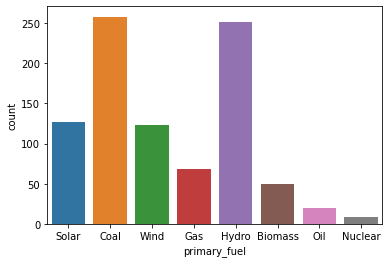

In [35]:
sns.countplot("primary_fuel",data=df)

coal is the highest primary_fuel and Nuclear is the least 

In [36]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

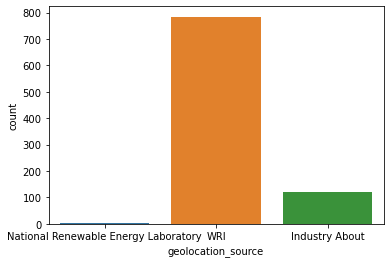

In [37]:
sns.countplot("geolocation_source",data=df)

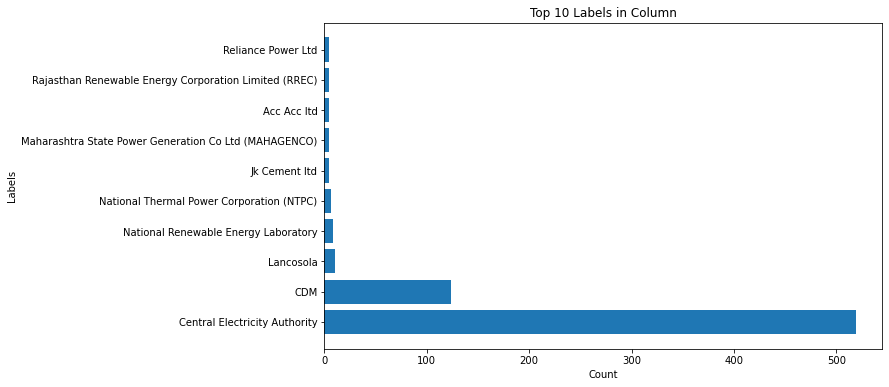

In [38]:
label_counts = df["source"].value_counts()
top_n = 10

top_labels = label_counts.head(top_n)
top_labels_names = top_labels.index.tolist()
top_labels_counts = top_labels.values.tolist()

plt.figure(figsize=(10, 6))
plt.barh(top_labels_names, top_labels_counts)
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title(f'Top {top_n} Labels in Column')
plt.show()

Central Electricity Authority is the highest source

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

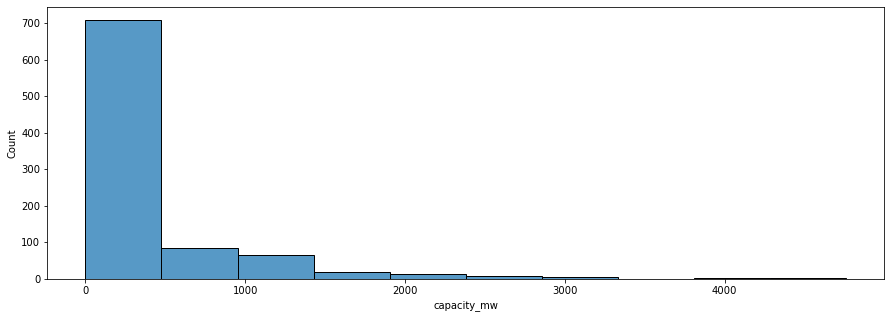

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(x='capacity_mw',data=df,bins=10)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

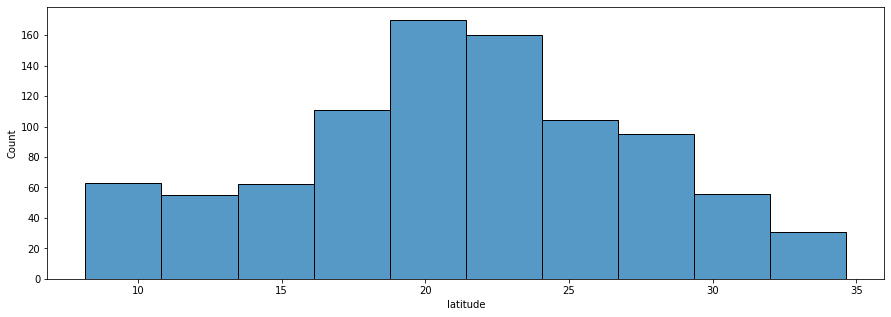

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(x='latitude',data=df,bins=10)

<AxesSubplot:xlabel='longitude', ylabel='Count'>

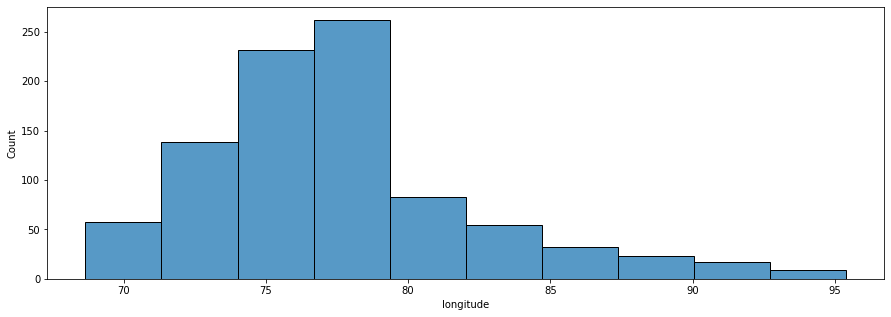

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(x='longitude',data=df,bins=10)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

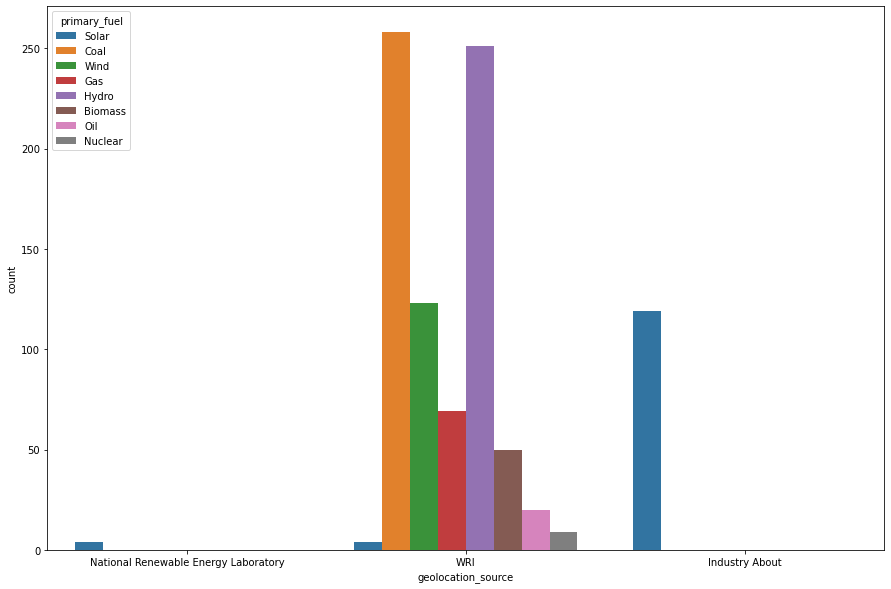

In [42]:
plt.figure(figsize=(15,10))
sns.countplot("geolocation_source",data=df, hue='primary_fuel')

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

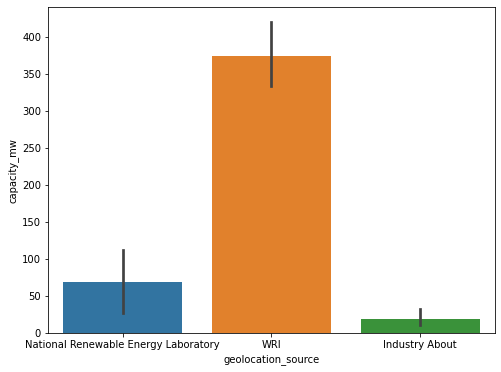

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x="geolocation_source",data=df, y='capacity_mw')

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

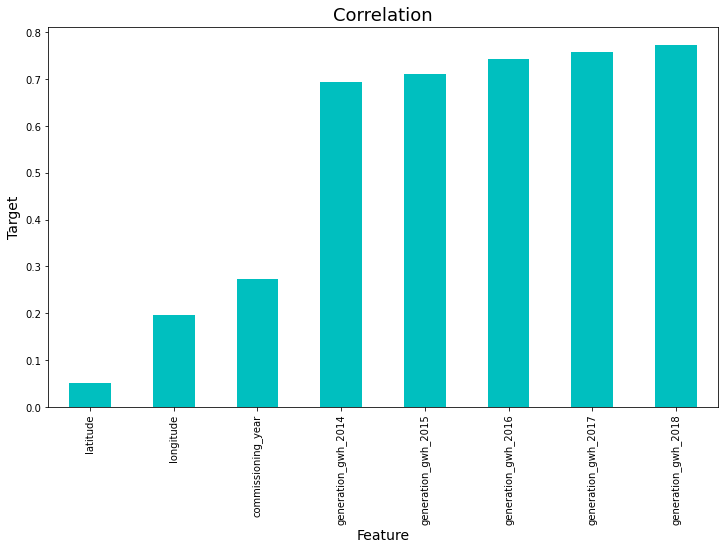

In [44]:
plt.figure(figsize=(12,7))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

 All Columns are positively correlated with target column "capacity_mw"

In [45]:
df.corr()["capacity_mw"].sort_values().to_frame("Correlation in Ascending order")

,Correlation in Ascending order
latitude,0.050984
longitude,0.195882
commissioning_year,0.274292
generation_gwh_2014,0.694350
generation_gwh_2015,0.711190
generation_gwh_2016,0.742221
generation_gwh_2017,0.757585
generation_gwh_2018,0.773456
capacity_mw,1.000000


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
code = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=code.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df.corr()["primary_fuel"].sort_values().to_frame("Correlation in Aescending order")

,Correlation in Aescending order
geolocation_source,-0.483217
capacity_mw,-0.380395
longitude,-0.347948
generation_gwh_2018,-0.136983
generation_gwh_2017,-0.132003
generation_gwh_2016,-0.131051
commissioning_year,-0.126650
generation_gwh_2015,-0.124828
generation_gwh_2014,-0.124769
latitude,-0.010204


1.The primary fuel type in the dataset shows a strong negative correlation with the geographical source of the power plants (-0.483217). This suggests that the choice of primary fuel is influenced by the specific geolocation of the power plants.

2.There is a moderate negative correlation between the primary fuel type and the capacity of the power plants (-0.380395). This implies that the choice of primary fuel may vary depending on the capacity of the power plant.

3.Other factors such as longitude, power generation in 2018, and commissioning year also exhibit negative correlations, albeit with smaller magnitudes. These variables may have some influence on the primary fuel type, although to a lesser extent compared to geolocation and capacity.

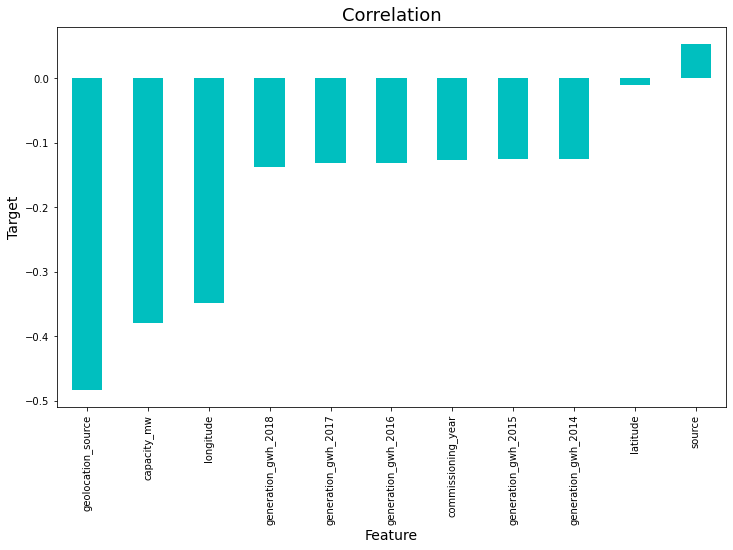

In [49]:
plt.figure(figsize=(12,7))
df.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

 All columns are negatively correlated with Target Column "primary_fuel"

<AxesSubplot:>

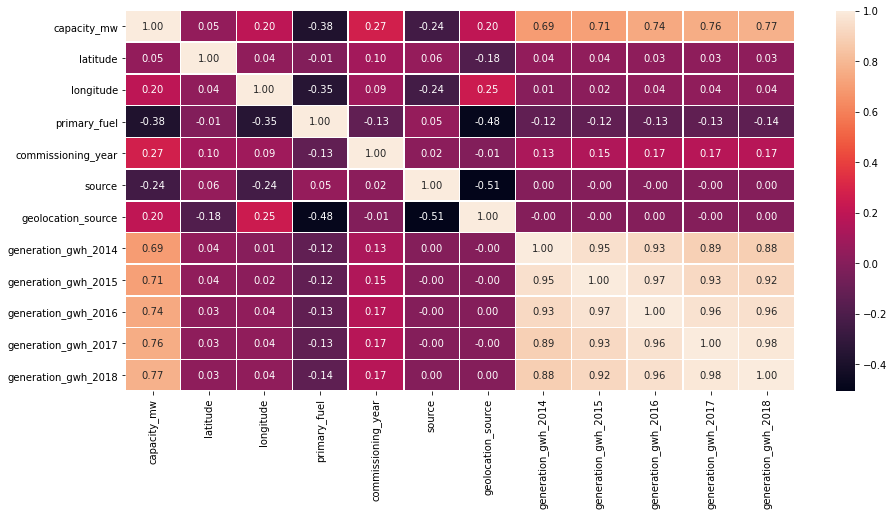

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

Multicollinearity can be seen in this analysis

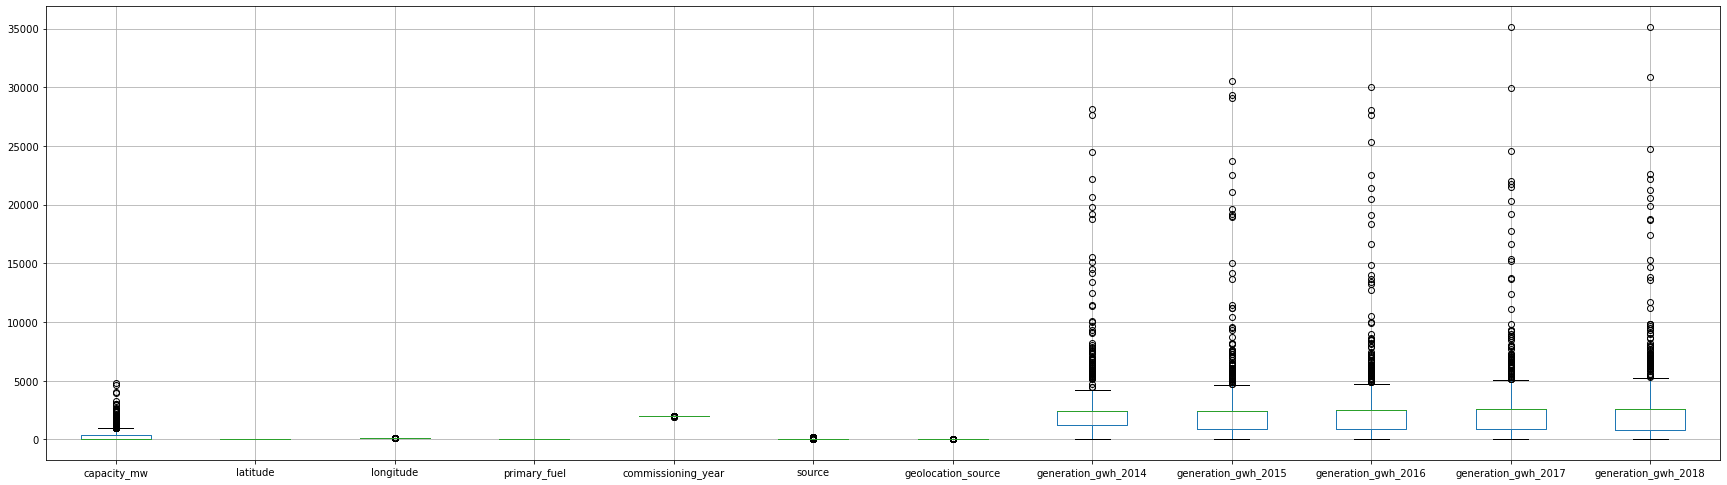

In [51]:
df.boxplot(figsize=(30,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers will be removed only from Continuous column: 'capacity_mw','latitude','longitude', 'commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' 

In [52]:
from scipy.stats import zscore

In [53]:
variable = df[['capacity_mw','latitude','longitude','commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' ]]
z = np.abs(zscore(variable))
z.shape

(907, 10)

In [54]:
threshold = 3
print (np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
       621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
       808, 808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880, 880,
       880, 880, 880, 880, 895, 900], dtype=int64), array([0, 6, 7, 8, 9, 4, 4, 0, 5, 6, 7, 8, 9, 0, 5, 2, 2, 4, 0, 5, 6, 7,
       8, 9, 3, 2, 4, 0, 5, 6, 7, 8, 9, 4, 2, 2, 2, 3, 4, 2, 0, 0, 5, 6,
       7,

In [55]:
print('Shape before removing outliers:', df.shape)

df_new = df[(z < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new.shape)

Shape before removing outliers: (907, 12)
Shape after removing outliers: (834, 12)


In [56]:
data_loss=((907-834)/907)*100
data_loss

8.04851157662624

In [57]:
variable1 = df[['latitude','longitude','commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' ]]
z1 = np.abs(zscore(variable1))
z1.shape

(907, 9)

In [58]:
threshold = 3
print (np.where(z1>3))

(array([ 15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 158, 179,
       183, 191, 209, 209, 209, 209, 209, 222, 244, 299, 308, 308, 308,
       308, 308, 321, 323, 333, 340, 342, 345, 360, 364, 364, 364, 364,
       364, 371, 416, 427, 444, 454, 478, 484, 493, 493, 493, 493, 493,
       494, 494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583,
       592, 601, 621, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 661, 669, 689, 695, 695, 695, 695, 695, 706, 709, 721, 721,
       721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 728,
       786, 786, 786, 786, 786, 807, 808, 808, 808, 808, 808, 818, 832,
       847, 848, 870, 871, 879, 880, 880, 880, 880, 880, 895, 900],
      dtype=int64), array([5, 6, 7, 8, 3, 3, 4, 5, 6, 7, 8, 4, 1, 1, 3, 4, 5, 6, 7, 8, 2, 1,
       3, 4, 5, 6, 7, 8, 3, 1, 1, 1, 2, 3, 1, 4, 5, 6, 7, 8, 2, 1, 1, 2,
       2, 2, 2, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8

In [59]:
print('Shape before removing outliers:', df.shape)

df_new1 = df[(z1 < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new1.shape)

Shape before removing outliers: (907, 12)
Shape after removing outliers: (840, 12)


In [60]:
data_loss=((907-840)/907)*100
data_loss

7.386990077177508

In [61]:
# target column : primary_fuel
df_new.skew()

capacity_mw            1.952694
latitude              -0.111185
longitude              0.911122
primary_fuel           0.412133
commissioning_year    -0.842130
source                 1.784584
geolocation_source    -2.104209
generation_gwh_2014    1.523244
generation_gwh_2015    1.388578
generation_gwh_2016    1.411295
generation_gwh_2017    1.278075
generation_gwh_2018    1.315105
dtype: float64

skewed variables : capacity_mw,longitude,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016, generation_gwh_2017,generation_gwh_2018

Threshold value: +/- 0.5

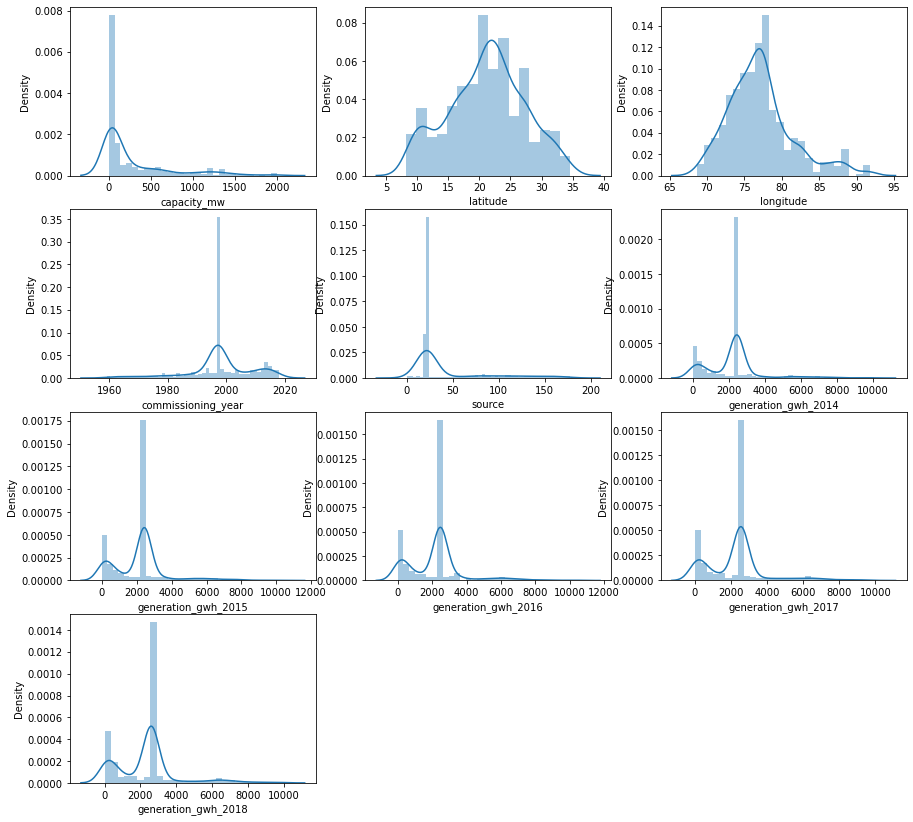

In [62]:
cat_list = ['capacity_mw','latitude','longitude','commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
plt.figure(figsize=(15,18))
plotnumber = 1

for column in df_new[cat_list]:
    if plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [63]:
for i in cat_list:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.log1p(df_new[i])
df_new.skew()

capacity_mw            0.064360
latitude              -0.111185
longitude              0.728520
primary_fuel           0.412133
commissioning_year    -0.842130
source                 0.781083
geolocation_source    -2.104209
generation_gwh_2014   -2.746235
generation_gwh_2015   -2.440184
generation_gwh_2016   -2.416320
generation_gwh_2017   -2.406898
generation_gwh_2018   -2.399066
dtype: float64

In [64]:
cat_list_new = ('longitude','commissioning_year','source','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018')
for i in cat_list_new:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.sqrt(df_new[i])
df_new.skew()

capacity_mw            0.064360
latitude              -0.111185
longitude              0.707912
primary_fuel           0.412133
commissioning_year    -0.842130
source                -0.533882
geolocation_source    -2.104209
generation_gwh_2014   -2.746235
generation_gwh_2015   -2.440184
generation_gwh_2016   -2.416320
generation_gwh_2017   -2.406898
generation_gwh_2018   -2.399066
dtype: float64

In [65]:
from sklearn.preprocessing  import power_transform, StandardScaler
cat_list_new = ('longitude','commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018')
for i in cat_list_new:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = power_transform(df_new[[i]], method='yeo-johnson')
df_new.skew()

capacity_mw            0.064360
latitude              -0.111185
longitude              0.000000
primary_fuel           0.412133
commissioning_year    -0.842130
source                -0.533882
geolocation_source    -2.104209
generation_gwh_2014   -2.746235
generation_gwh_2015   -2.440184
generation_gwh_2016   -2.416320
generation_gwh_2017   -2.406898
generation_gwh_2018   -2.399066
dtype: float64

In [66]:
# target column : capacity_mw 
df_new1.skew()

capacity_mw            2.136150
latitude              -0.112335
longitude              0.906539
primary_fuel           0.423612
commissioning_year    -0.834096
source                 1.796064
geolocation_source    -2.116273
generation_gwh_2014    1.522552
generation_gwh_2015    1.374346
generation_gwh_2016    1.387879
generation_gwh_2017    1.291276
generation_gwh_2018    1.417776
dtype: float64

skewed variable : longitude,commissioning_year, source, generation_gwh_2014,generation_gwh_2015,generation_gwh_2016, generation_gwh_2017,generation_gwh_2018   

Threshold value : +/- 0.5

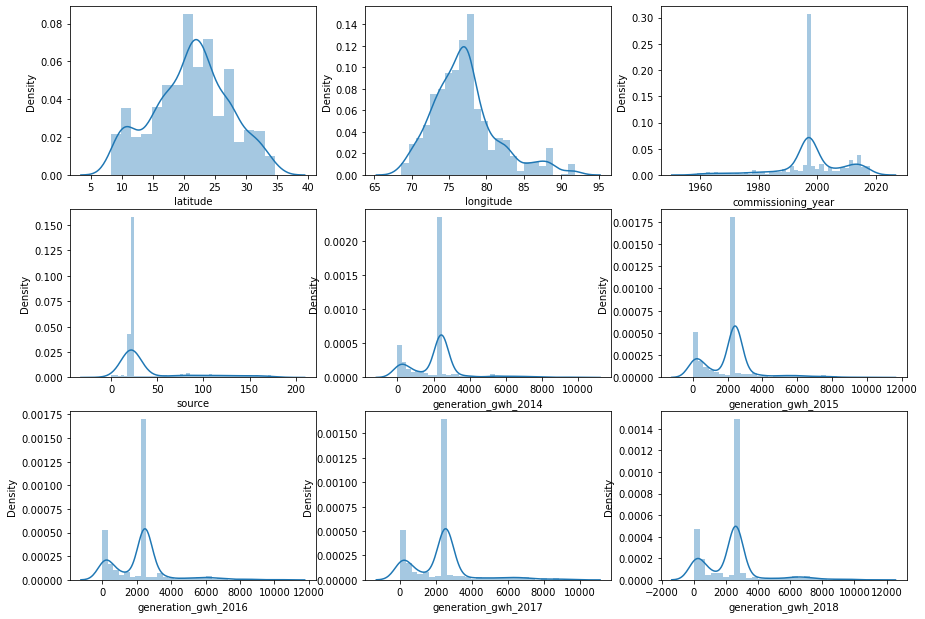

In [67]:
cat_list1 = ['latitude','longitude','commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
plt.figure(figsize=(15,18))
plotnumber = 1

for column in df_new1[cat_list1]:
    if plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [68]:
for i in cat_list1:
    if df_new1.skew().loc[i]>0.55:
        df_new1[i] = np.log1p(df_new1[i])
df_new1.skew()

capacity_mw            2.136150
latitude              -0.112335
longitude              0.723733
primary_fuel           0.423612
commissioning_year    -0.834096
source                 0.791199
geolocation_source    -2.116273
generation_gwh_2014   -2.758602
generation_gwh_2015   -2.450625
generation_gwh_2016   -2.408393
generation_gwh_2017   -2.409304
generation_gwh_2018   -2.395539
dtype: float64

In [69]:
cat_list_new = ('longitude','commissioning_year','generation_gwh_2014','source', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018')
for i in cat_list_new:
    if df_new1.skew().loc[i]>0.55:
        df_new1[i] = power_transform(df_new1[[i]], method='yeo-johnson')
df_new.skew()

capacity_mw            0.064360
latitude              -0.111185
longitude              0.000000
primary_fuel           0.412133
commissioning_year    -0.842130
source                -0.533882
geolocation_source    -2.104209
generation_gwh_2014   -2.746235
generation_gwh_2015   -2.440184
generation_gwh_2016   -2.416320
generation_gwh_2017   -2.406898
generation_gwh_2018   -2.399066
dtype: float64

In [70]:
cat_list_new = ('commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018')
for i in cat_list_new:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = power_transform(df_new1[[i]], method='yeo-johnson')
df_new.skew()

capacity_mw            0.064360
latitude              -0.111185
longitude              0.000000
primary_fuel           0.412133
commissioning_year    -0.842130
source                -0.533882
geolocation_source    -2.104209
generation_gwh_2014   -2.746235
generation_gwh_2015   -2.440184
generation_gwh_2016   -2.416320
generation_gwh_2017   -2.406898
generation_gwh_2018   -2.399066
dtype: float64

Spliting data into Target and Features: Target Variable is primary_fuel

In [71]:
x=df_new.drop("primary_fuel",axis=1)
y=df_new["primary_fuel"]

As a classification problem we need to balance the data of target column so that we use oversampling method

In [72]:
y.value_counts()

1    231
3    221
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [75]:
y.value_counts()

7    231
6    231
5    231
4    231
3    231
2    231
1    231
0    231
Name: primary_fuel, dtype: int64

now the target column have equal proportion

In [76]:
# scale the whole data into single format
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

Spliting data into Target and Features: Target Variable is capacity_mw

In [77]:
x1=df_new1.drop("capacity_mw",axis=1)
y1=df_new1["capacity_mw"]

In [78]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

The Variance Threshold method allows you to eliminate low-variance features, which often correspond to constant or near-constant values, to reduce the dimensionality of the dataset and potentially improve model performance.

Target Variable is primary_fuel

In [79]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [80]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [81]:
var_threshold.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [82]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [83]:
# taking  out  all the  constent  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

1


In [84]:
cons_columns

['longitude']

In [85]:
x = x.drop(["longitude"],axis=1)

 Target Variable is capacity_mw

In [86]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [87]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [88]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [89]:
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

1


In [90]:
cons_columns

['longitude']

In [91]:
x1 = x1.drop(["longitude"],axis=1)

In [92]:
# solving multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
#  Target Variable is primary_fuel
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.477224,capacity_mw
1,1.126630,latitude
2,1.077737,commissioning_year
3,1.294524,source
4,1.470214,geolocation_source
5,3.850606,generation_gwh_2014
6,6.585170,generation_gwh_2015
7,8.146049,generation_gwh_2016
8,3.700034,generation_gwh_2017
9,6.808361,generation_gwh_2018


In this case we considered threshold value 10 by default, but the value is less than 10

VIF for Target Variable is capacity_mw

In [94]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.072078,latitude
1,1.413198,primary_fuel
2,1.063022,commissioning_year
3,1.293232,source
4,1.714260,geolocation_source
5,2.594201,generation_gwh_2014
6,4.238126,generation_gwh_2015
7,6.891640,generation_gwh_2016
8,4.506228,generation_gwh_2017
9,5.686559,generation_gwh_2018


Here, also same case

Creating Model We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw

Target Variable: primary_fuel

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [96]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9027027027027027  on Random_state  14


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [98]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7135135135135136
confusion_matrix: 
 [[65  1  0  0  0  0  0  4]
 [ 4 25  6  1 16  4  0  2]
 [ 3  9 34  9  2 13  0  3]
 [ 0 15  3 30  4  3  0 17]
 [ 0  2  0  5 58  0  0  0]
 [18  2  0  1  0 41  0  5]
 [ 0  2  0  0  0  0 73  0]
 [ 0  0  0  5  0  0  0 70]]
classification_report: 
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        70
           1       0.45      0.43      0.44        58
           2       0.79      0.47      0.59        73
           3       0.59      0.42      0.49        72
           4       0.72      0.89      0.80        65
           5       0.67      0.61      0.64        67
           6       1.00      0.97      0.99        75
           7       0.69      0.93      0.80        75

    accuracy                           0.71       555
   macro avg       0.70      0.71      0.69       555
weighted avg       0.71      0.71      0.70       555



In [99]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9009009009009009
confusion_matrix: 
 [[67  2  0  0  0  1  0  0]
 [ 3 33  7  6  8  1  0  0]
 [ 2  4 58  3  2  4  0  0]
 [ 0  2  5 64  1  0  0  0]
 [ 0  0  0  2 63  0  0  0]
 [ 0  1  1  0  0 65  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 75]]
classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.79      0.57      0.66        58
           2       0.82      0.79      0.81        73
           3       0.85      0.89      0.87        72
           4       0.85      0.97      0.91        65
           5       0.92      0.97      0.94        67
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        75

    accuracy                           0.90       555
   macro avg       0.89      0.89      0.89       555
weighted avg       0.90      0.90      0.90       555



In [100]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.9045045045045045
confusion_matrix: 
 [[69  1  0  0  0  0  0  0]
 [ 2 36  6  7  5  2  0  0]
 [ 0  5 55  5  2  6  0  0]
 [ 0  2  4 62  2  2  0  0]
 [ 0  0  0  0 65  0  0  0]
 [ 0  0  2  0  0 65  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 75]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.82      0.62      0.71        58
           2       0.82      0.75      0.79        73
           3       0.84      0.86      0.85        72
           4       0.88      1.00      0.94        65
           5       0.87      0.97      0.92        67
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        75

    accuracy                           0.90       555
   macro avg       0.90      0.90      0.90       555
weighted avg       0.90      0.90      0.90       555



In [101]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7783783783783784
confusion_matrix: 
 [[64  1  0  0  0  3  0  2]
 [ 4 24  7  2 17  2  0  2]
 [ 2  7 43  7  2 10  0  2]
 [ 0 12  6 33  4  0  0 17]
 [ 0  0  0  0 65  0  0  0]
 [ 9  0  0  1  0 53  0  4]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 75]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        70
           1       0.55      0.41      0.47        58
           2       0.77      0.59      0.67        73
           3       0.77      0.46      0.57        72
           4       0.74      1.00      0.85        65
           5       0.78      0.79      0.79        67
           6       1.00      1.00      1.00        75
           7       0.74      1.00      0.85        75

    accuracy                           0.78       555
   macro avg       0.77      0.77      0.76       555
weighted avg       0.77      0.78      0.76       555



In [102]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8342342342342343
confusion_matrix: 
 [[67  1  0  0  0  2  0  0]
 [ 3 29  8  3 11  4  0  0]
 [ 2  6 48  1  2 14  0  0]
 [ 0  9  5 47  1  2  0  8]
 [ 0  1  0  3 61  0  0  0]
 [ 3  0  2  0  0 62  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  1  0 74]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        70
           1       0.63      0.50      0.56        58
           2       0.76      0.66      0.71        73
           3       0.87      0.65      0.75        72
           4       0.81      0.94      0.87        65
           5       0.73      0.93      0.82        67
           6       1.00      1.00      1.00        75
           7       0.90      0.99      0.94        75

    accuracy                           0.83       555
   macro avg       0.83      0.83      0.82       555
weighted avg       0.83      0.83      0.83       555



cross validation score of models

In [105]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.6991225371713177


In [106]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.9025869772211236


In [107]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8679601552772285


In [108]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.7656881271515419


In [109]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8327810737566835


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

In [110]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"],
            "min_samples_split": [2, 5, 10],
            "n_estimators": [50, 100, 200]}

In [113]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [114]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [115]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 50}

In [117]:
final_model=RandomForestClassifier(max_depth=9,criterion="entropy",min_samples_split= 2 ,n_estimators = 50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(confusion)

0.8792792792792793
[[63  3  0  0  0  3  0  1]
 [ 3 29  7  5 11  3  0  0]
 [ 2  3 53  3  2 10  0  0]
 [ 0  4  5 63  0  0  0  0]
 [ 0  0  0  2 63  0  0  0]
 [ 0  0  0  0  0 67  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 75]]


In [118]:
#  ROC-AUC Curve
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

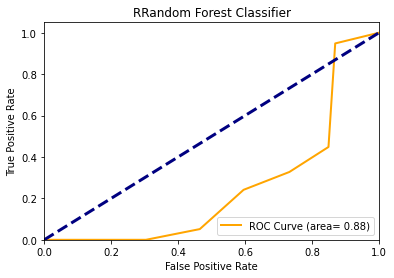

In [119]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=2,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.88


In [120]:
# for save the model
import pickle

In [123]:
pickle.dump(gcv,open('Global_Power_Plant.pickle','wb'))
loaded_model = pickle.load(open('Global_Power_Plant.pickle', 'rb'))
loaded_model.predict(x_test)

array([1, 7, 2, 7, 4, 0, 7, 6, 6, 3, 4, 6, 0, 6, 5, 5, 1, 3, 2, 5, 3, 5,
       1, 5, 1, 7, 7, 2, 6, 2, 1, 5, 1, 3, 4, 0, 0, 3, 7, 1, 4, 7, 2, 0,
       6, 2, 5, 7, 7, 3, 0, 6, 5, 2, 3, 6, 3, 4, 5, 2, 3, 3, 5, 6, 3, 1,
       6, 5, 2, 2, 6, 6, 6, 0, 6, 2, 1, 6, 5, 5, 0, 2, 4, 3, 4, 6, 5, 3,
       0, 5, 3, 1, 3, 4, 6, 2, 4, 7, 2, 6, 0, 3, 3, 3, 4, 7, 4, 4, 6, 6,
       0, 3, 4, 0, 6, 3, 6, 7, 7, 4, 5, 4, 0, 0, 2, 3, 6, 5, 3, 2, 0, 4,
       3, 0, 5, 7, 1, 1, 2, 0, 5, 6, 5, 0, 7, 2, 7, 7, 4, 2, 3, 6, 2, 7,
       6, 5, 6, 5, 5, 4, 4, 3, 7, 2, 3, 7, 0, 3, 0, 4, 2, 2, 1, 5, 3, 5,
       4, 5, 5, 4, 1, 2, 7, 2, 0, 7, 6, 2, 3, 2, 6, 4, 0, 5, 6, 7, 1, 3,
       4, 2, 0, 5, 4, 7, 2, 6, 0, 7, 7, 3, 2, 4, 5, 2, 0, 3, 7, 7, 2, 3,
       1, 1, 0, 7, 3, 7, 7, 6, 7, 0, 0, 5, 6, 7, 3, 1, 0, 4, 5, 7, 3, 7,
       6, 1, 4, 4, 5, 6, 6, 7, 6, 6, 7, 0, 4, 0, 7, 3, 7, 6, 3, 2, 5, 2,
       3, 3, 2, 3, 0, 7, 2, 1, 7, 1, 4, 3, 0, 1, 5, 5, 2, 7, 5, 6, 6, 4,
       2, 4, 0, 0, 2, 4, 7, 6, 5, 5, 6, 7, 1, 7, 2,

In [124]:
  #Checking predicted and original values
a =np.array(y_test)
predicted=np.array(gcv.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,3,1
1,7,7
2,2,2
3,7,7
4,4,4
...,...,...
550,5,5
551,5,5
552,6,6
553,0,0


Target variable : "capacity_mw"

In [126]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [127]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7952202108028397 on random_state: 89


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [129]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_lr))
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.41515864865437124
Mean abs error:  251.46855832094457
Mean squared error:  145703.03791118017
Root Mean Squared Error:  381.71067303807496


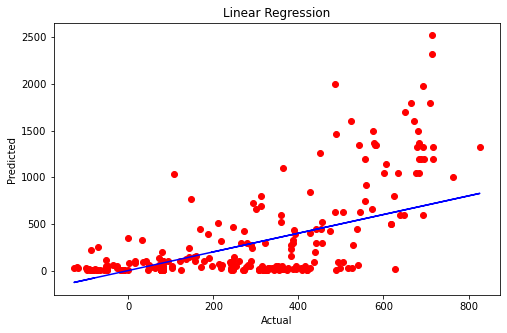

In [134]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_lr, y = y_test , color= 'r')
plt.plot(pred_lr,pred_lr,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

In [135]:
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_RFR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8339381034840934
Mean abs error:  100.80052900921842
Mean squared error:  41371.42961589332
Root Mean Squared Error:  203.39967948817747


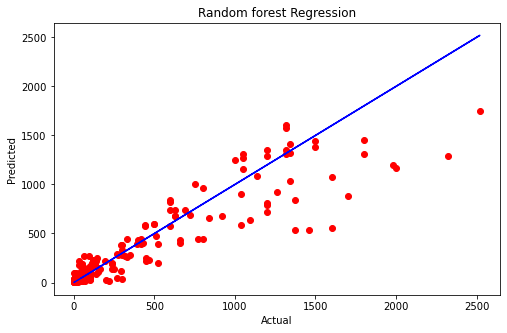

In [144]:
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_RFR,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

In [140]:
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_knn))
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7450641374852502
Mean abs error:  131.62312654320988
Mean squared error:  63512.83054018208
Root Mean Squared Error:  252.01752030401


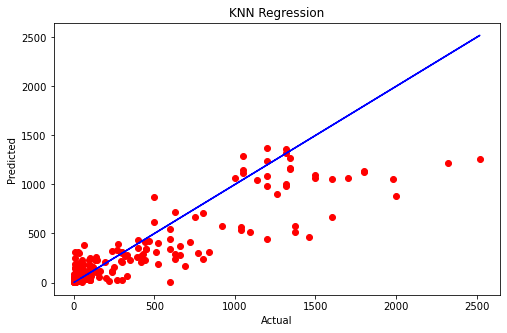

In [145]:
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_knn,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression")
plt.show()

In [146]:
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_DTR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7710171523309902
Mean abs error:  124.74277777777776
Mean squared error:  57047.08885266667
Root Mean Squared Error:  238.8453241172342


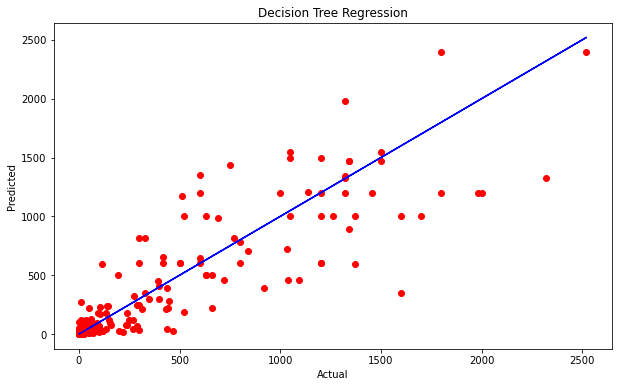

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression")
plt.show()

In [148]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.29027634660350377


In [149]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7749173467109182


In [150]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.6651130326511137


In [151]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.5778695962479026


From the observation of R2 Score and cross validation score and their difference we can predict that Random Forest Regressor is the best model.

In [152]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [153]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [154]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [155]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [156]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 30,criterion = 'mse', max_depth= 10, max_features = 'sqrt',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)
pred = Best_model_Regressor.predict(x_test)
acc = r2_score(y_test,pred_RFR)
print(acc*100)

83.39381034840933


In [157]:
filename='Global_Power_Plant_Database_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([  63.63410954, 1432.77148644,  463.79319295,  221.17761063,
       1378.3849654 ,   77.02550776,  175.36643782,   44.22959841,
         31.07197663,  812.78442607,   33.72032066,   37.39735004,
        843.20191329, 1012.61446081,   26.38427248,  562.1955607 ,
        123.20495293,   15.71981919,  548.02017778,  172.26872998,
        493.20955507,   41.55121438,  459.51886257,  321.10994034,
        452.90497489,   34.38951702,   50.08920253,   58.37490557,
        333.56755057,   34.47805567, 1361.07750805,   90.4983387 ,
         62.06295988,  126.00745483,   37.84503229,   54.54769067,
         34.38951702,   22.7486564 ,  173.90661559,  122.58822819,
        105.1525627 ,   21.93666599,   20.11071244,   14.26729454,
        127.99854997,   36.40311402,   33.63715845,  345.1269828 ,
        298.62038029,   14.26729454,   35.26309569,  471.84255377,
        441.380489  , 1097.46286017,   34.04053715,   46.00083784,
         27.73161316,  632.94547479,  323.40273687,  400.89743

In [158]:
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,45.00,63.634110
1,2320.00,1432.771486
2,420.00,463.793193
3,34.65,221.177611
4,1500.00,1378.384965
...,...,...
247,2.00,29.524983
248,6.00,27.613646
249,5.00,33.720321
250,100.00,58.293593
